### Prospect Mapping for PGL

#### Questions
- PP Bracket?
- What is the true indicator to measure success of a field?
- FY?
- Is there a number of times a school has used PGL?

I used a script to convert the data to a csv file as it was taking about 30 seconds to read the excel sheet. CSV is usually faster to read.

In [1]:
# importing the necessary modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Importing the data from the .xlsx as a data frame using the pandas module
df = pd.read_csv("PGL_data.csv", low_memory = False)

df now holds the whole data frame which is a bit too large to handle. Below I have created a list of all the headings so that I can see them without opening the excel sheet. When I want to reference a heading, I can just use the index of the heading rather than having to remember the name. These are stored in the variable 'col'. The number of columns with a value has also been stated for later use.

In [3]:
col = df.columns.tolist()

print('index  |                     column name     |    number of entries')
print('-------------------------------------------------------------------------------------')
for heading in col:
    print("%3.0f    |    %30s   |    %8.0f" % (col.index(heading), heading, len(df[heading].loc[df[heading].notna()])))
print('-------------------------------------------------------------------------------------')
#df.head()

index  |                     column name     |    number of entries
-------------------------------------------------------------------------------------
  0    |                      Account Name   |      187864
  1    |          Establishment Aplicor ID   |      187858
  2    |                Contact Aplicor ID   |      187864
  3    |                             Stage   |      187514
  4    |                Opportunity Source   |       87182
  5    |                       Loss Reason   |       51912
  6    |                           Product   |      183022
  7    |                            Course   |       59973
  8    |                 Booking Reference   |      187864
  9    |             Centre(s) of Interest   |       63827
 10    |                Accommodation Type   |       21327
 11    |                      Arrival Date   |      165044
 12    |                      Booking Date   |      139149
 13    |                         Age Range   |       59343
 14    |            

***
To analyse the effects of a school caracteristic on their interaction with PGL, a column must be chosen which represents the extent of interaction and this column should really be filled in for all schools, or at least most.

In [4]:
k=6
df[col[k]].loc[df[col[k]].notna()].value_counts(normalize=True).mul(100).round(3).head(10)

AUK (Adventure UK)          77.241
ST (School Tours)           10.909
SK (Ski)                     6.222
OSA (Overseas Adventure)     4.795
Ski                          0.209
Ski (PGL)                    0.178
LA (International)           0.161
Netball (PGL)                0.042
CO (Corporate)               0.036
Modern Foreign Languages     0.022
Name: Product, dtype: float64

***
### Number of Children band

Focusing on one school characteristic at a time, starting with the number of children band.

There seems to be a lot of empty cells so to begin with, it may be useful to understand what proportion of each column is blank.
The line below is removing all lines in this column that have NaN in the cell and showing how many rows remain. Number of Children has been used as an example.

In [5]:
def notna_in_col(name):
    print("Total number of schools = " + str(len(df)))
    print("Number of schools with a value for '" + name + "' = " + str(len(df[name].loc[df[name].notna()])))
    print('%.1f' % (int(len(df[name].loc[df[name].notna()]) / len(df) * 100))+ "% of schools have an entry for this column")

notna_in_col('Number of Children Band')

Total number of schools = 187864
Number of schools with a value for 'Number of Children Band' = 154771
82.0% of schools have an entry for this column


***
By taking the number of children band column and removing all empty cells, the row count falls from 187864 to 154771 meaning that 82.4% of schools have a value for that column.

I wanted to briefly look at one that looked sparsely populated. For the School Size by Pupils Banding, only 32.9% of schools have a value for this category. If an average value has to be given to the schools without values, this may skew the data for this category. I would suggest that columns with less than 50% of schools data should probabily be removed from a decile scoring to avoid adding weight to the averages.

Below is a count of how many schools are in each band. This is interesting to know however does not tell us anything about how this affects the interaction with PGL.

In [50]:
# number of children band has the index 42
a = 1
print(col[a])
df[col[a]].loc[df[col[a]].notna()].value_counts().head(50)

Establishment Aplicor ID


D3CDEA22-A407-4D55-8BB6-2CDEFA39D20B    591
90019712-630C-46A5-97DA-3700973C36D4    139
5418D529-39E2-451F-8FC0-12ED43A769D0    114
750A0A98-2D53-451B-B4C0-D027AB49A048    106
818D43DF-714A-4259-B90D-FA57279CDE5E    103
1A6BB267-895B-4BAE-9F4E-A8AF9DFDE405    102
F4850C85-64ED-4054-9DF8-7FF1A191A5F5    100
7676D6D9-CF0E-4429-8449-E986B9AB042B     92
67CF1F69-37A2-413D-95C9-E2CD3BBE07A4     84
B8DE33F2-F60A-40BC-B8D1-6F041949597F     83
D964C044-C92F-4AD9-B01C-5942E771BB98     81
30BA25BB-411F-4A8D-B18A-411C0FB390D9     81
EAF58CD6-581F-4B76-80F7-7D7887B78F93     80
177F1028-609C-4C12-BD92-BEE21CF22C75     79
61A278AE-CDE4-4ED1-B058-795403DB1626     79
8F33CE76-0394-4888-9E48-A36301D6EB3F     79
141ABD75-1588-493F-83B5-528CD000BD46     79
1879A07E-00C9-46B5-BFBB-F994C79A0B5B     78
702D7724-DA8B-4B9C-8B0C-9336C6D13DCA     77
A2A10570-7CA3-494A-8BCF-DE9CEA05511F     77
68AEB87E-5F37-4B94-AF4C-34B4A845F002     76
6849C264-4442-40A1-89B0-61EB0EF1A0FA     76
2140BC7D-F44D-4E37-8960-E934BD8C

***
To find how a certain column affects the schools interaction with PGL, a quantifiying column must be chosen which tells us their level of interaction. This column must also be completely, or at least mostly, populated to show this correlation.

A column has been added to the table in cell 3 which includes how many entries each column has, to see if a characteristic can be used to judge a schools interaction with PGL.

New_existing could have been useful I think if it said how many time a school used PGL instead of a binary answer.

Below is a line to see the first 50 entries of a column. Just useful to get a preview without having to open up the data. It is commented out at the moment to reduce clutter.

In [7]:
# requested duration is index 20
#a = 20
#df[col[a]].loc[df[col[a]].notna()].head(50)

***
Now looking at the influence of a column starting with the number of children. Maybe the time lapse band will be a good indication of how keen they are? Might be misinterpretting this. I see that there are a lot of lines saying 'Do Not Apply' which I think is like being empty so making sure that there are enough entries, the next cell will work out how many cells have an entry and removing any that have No Not Apply.

In [8]:
time_lapse_notna  = df[col[41]].loc[df[col[41]].notna()]
time_lapse_notna = time_lapse_notna.loc[~time_lapse_notna.str.contains("Do Not Apply")]
print(len(time_lapse_notna))

164987


There are enough cells with data to use it.

The function below will take as input the names of two columns and plot them against each other, removing any lines with an empty field.

There are  160007  number of entries for this plot


(-1.0, 24.15)

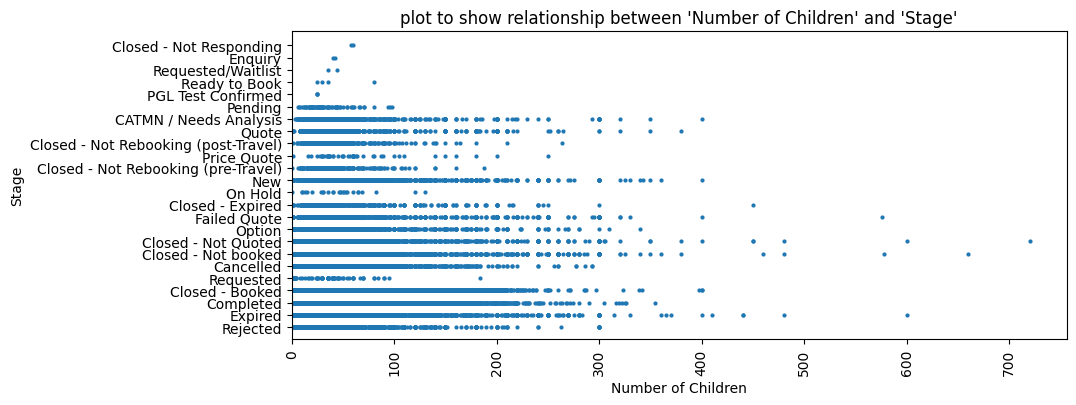

In [9]:
def relationshiplot(x,y):
    dx = df.loc[df[x].notna() & df[y].notna()].sort_values(x,ascending = True)  
    #sns.lineplot(dx[x],dx[y])
    print('There are ',len(dx), ' number of entries for this plot')
    plt.figure(figsize=(10,4))
    plt.scatter(dx[x],dx[y],marker='.', linewidths=0.01)
    plt.xlabel('%s' % x)
    plt.xlim(0)
    plt.ylim(0)
    plt.tick_params(rotation=90, axis = 'x')
    plt.ylabel('%s' % y)
    plt.title("plot to show relationship between '%s' and '%s'" % (x, y))

relationshiplot(col[14],col[3])
plt.ylim(-1)

This plot above shows us a bit more about the relationship between the stage of the booking and the number of children. This time I used the number of children as raw number rather than the band which I believe shows a better relationship. The function eliminates any schools that don't have a value for one or both characteristics to avoid plotting NaN values. Above the plot, the amount of data points for the plot is stated.

Total revenue is probably a good area to look into. This category has 187864 entries meaning 61.9% of schools have a value for this.

There are  116233  number of entries for this plot


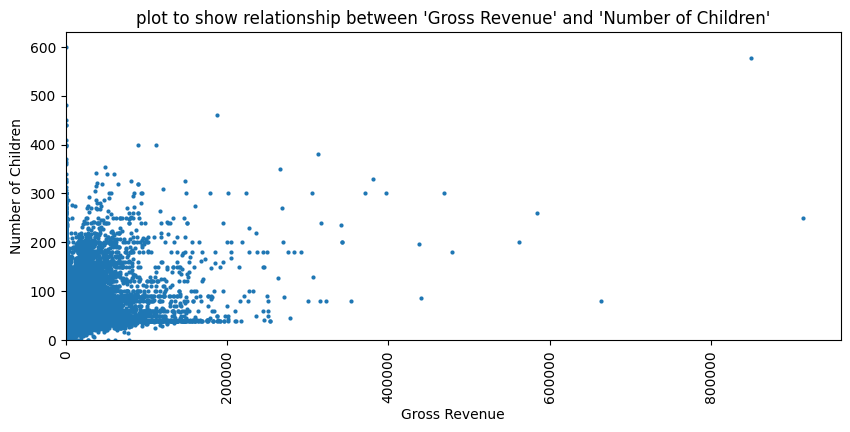

In [10]:
relationshiplot(col[22],col[14])

This data is quite hard to read plotted like this. I'd say there is a trend for higher revenue for a higher number of children however, there seems to be a wall of 0 revenue. Below, the 0 values for revenue will be removed to try and clean up the plot and the axis limits will be adjusted.

62369
There are  62367  number of entries for this plot


(0.0, 400.0)

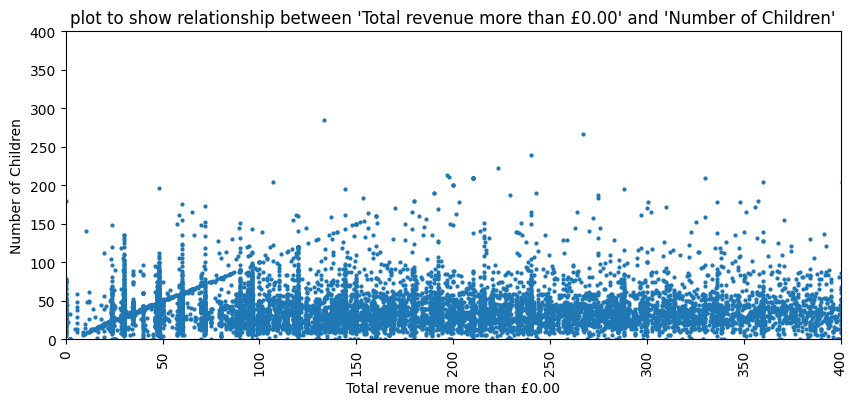

In [11]:
print(len(df[col[22]].loc[df[col[22]].notna() & (df[col[22]] != 0)]))
df['Total revenue more than £0.00'] = df[col[22]].replace(0, np.nan)
relationshiplot('Total revenue more than £0.00',col[14])
plt.ylim([0,400])
plt.xlim([0,400])

After removing all 0 values and setting limits of 400 to both axes, a very clear trend can be seen for some data but also vertical lines at points which would suggest a strange level of correlation.

There are  22050  number of entries for this plot


(-0.2, 10.5)

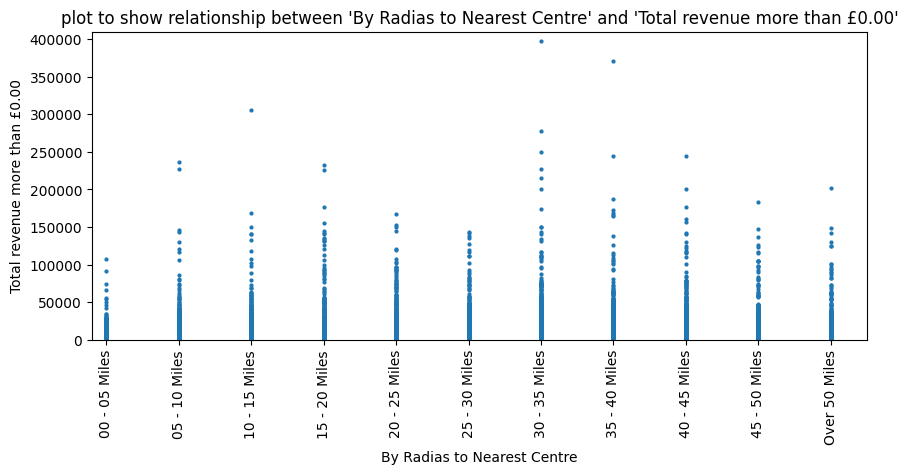

In [13]:
relationshiplot(col[45],'Total revenue more than £0.00')
plt.ylim([0,410000])
plt.xlim(-0.2)

In [40]:
df[col[45]].loc[df[col[45]].notna()].value_counts().sort_values()

30 - 35 Miles    9902
35 - 40 Miles    9645
25 - 30 Miles    7269
40 - 45 Miles    6694
20 - 25 Miles    6141
Over 50 Miles    5121
45 - 50 Miles    4900
15 - 20 Miles    4535
10 - 15 Miles    3631
05 - 10 Miles    2945
00 - 05 Miles     985
Name: By Radias to Nearest Centre, dtype: int64

Now just trying different columns against the revenue to see if revenue is an indicator of how good a school is. Above seeing the relationshup between it and the radius to the nearest centre

There are  116050  number of entries for this plot


(-0.1, 11.55)

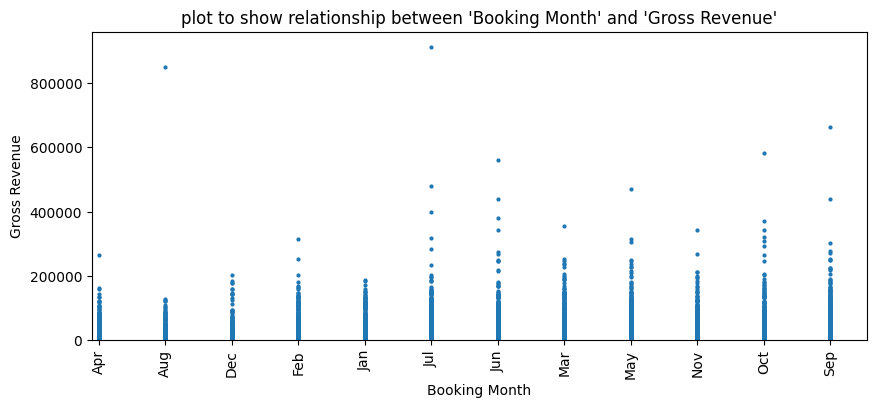

In [27]:
#df_mapping = pd.DataFrame({ 'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']})
#sort_mapping = df[col[29]].reset_index().set_index('month')

df[col[29]].loc[df[col[29]].notna()].sort_values()
relationshiplot(col[29],col[22])
plt.xlim(-0.1)

The last plot shows that